# RANSAC
These exercises will introduce you to robust model fitting. You will implement straight line finding using RANSAC.

Here you should estimate a line to a data set consisting of inliers with noise and outliers. Such data is generated by the following function:

## TODO:
* Move functions to library and specify it in header
* Represent lines with homogeneous coordinates - The first two coordinates should have norm 1

In [99]:
import numpy as np
from matplotlib import pyplot as plt
from copy import deepcopy
import sys

sys.path.append('..') #go back 1 folder
from library import *

## Exercise 7.1
Make a function that estimates a line, in homogeneous coordinates, given two points.

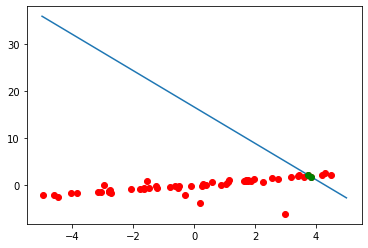

In [100]:
# CREATE POINTS
n_in = 50 #number of inliers
n_out = 5 #number of outliers
pts = test_points(n_in,n_out)

# FIND LINE FROM 2 POINTS
P,Q = choose_2points(pts)
line = est_line(P, Q) # y = ax+b, line=(a,b)

# PLOT IT !
plt = plot_graph(pts,line)
plt.plot(P[0],P[1],'go')
plt.plot(Q[0],Q[1],'go')
plt.savefig('ex7_plot1.jpg', bbox_inches='tight',dpi=500)
plt.show()


## Exercise 7.2
Make a function that determines if a given 2D point is an inlier or an outlier with respect to a given line. The threshold should be supplied as parameter to this function, such that it can easily be tuned later

Outlier


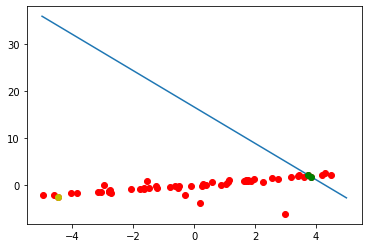

In [101]:
threshold = 0.5
R = (pts[0][0],pts[1][0]) # TODO: it is not a random point :)
if inlier(R,line,threshold): print("Inlier")
else: print("Outlier")


# PLOT IT !
plt = plot_graph(pts,line)
plt.plot(P[0],P[1],'go')
plt.plot(Q[0],Q[1],'go')
plt.plot(R[0],R[1],'yo')
plt.show()

## Exercise 7.3
Make a function that calculates the consensus, i.e. the number of inliers, for a line with respect to a set of points

In [102]:
inliers = consensus(pts,threshold,line)
print("Inliers: ",inliers, "Outliers: ", len(pts[0])-inliers)

Inliers:  2 Outliers:  53


## Exercise 7.4
Make a function that randomly draws two of n 2D points.

In [103]:
P,Q = choose_2points(pts)
print(P)
print(Q)

(-4.475235345325403, -2.626310718204072)
(2.255758478364658, 0.6496717040772929)


## Exercise 7.5
Assemble the functions made above to a working RANSAC algorithm for estimating lines. Set the number of iterations and the threshold manually.


Number of inliers:  50


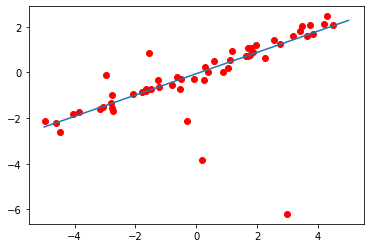

In [104]:
most_inliers, line = RANSAC_simple(pts,0.59,iterations=150)
print("Number of inliers: ",most_inliers)

# PLOT IT !
plt = plot_graph(pts,line)
plt.savefig('ex7_plot2.jpg', bbox_inches='tight',dpi=500)
plt.show()
       

## Exercise 7.6 Threshold
Experiment with the algorithm, what is a good threshold for distinguishing between inliers and outliers?
* Using threshold 0.59 is a great choice, since we detect very close to 5000 inliers, which is the correct result (ran for this task with higher number of points)

Henrik's answer:
* If it is too big, then the "best line" will just be any line pointing in more or less the right direction. If it is too small then any line will be equally bad and the results are random.
* Using 1/4 the thickness of the shape of the points seems to be nice.

## Exercise 7.7
Add the final step to your implementation, where you fit a new line to all inliers of the best line. The total least squares fit of a straight line to a set of points is given by the first principal component of them. Consider using the code below to get a homogeneous line along the first principal component.

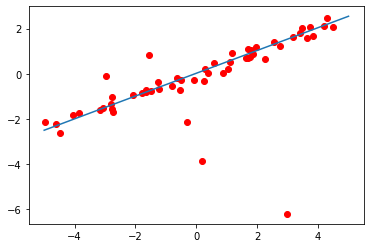

In [105]:
most_inliers, line = RANSAC_simple(pts,0.59,iterations=150)
pts_inliers = remove_outliers(pts,line,threshold)
line = pca_line(pts_inliers)
line = line_normalizer(line[0],line[1],line[2])

# PLOT IT !
plt = plot_graph(pts,line)
plt.show()

## Exercise 7.8
Implement the stopping criteria for RANSAC as described on the slides. Use p = 0 99

-----

* $\epsilon$ fraction of outliers, in out case epsilon = 0.1
* n is the datapoints in one sample: DoF of the model we want to fit.
* p is the probability of having at least one sample with no outlayers
* Run the algorithm until N samples has been tested: $N = \frac{log(1-p)}{log(1-(1-\epsilon)^n)}$ => p is guaranteed.
* Often, you do not know epsilon. Then use eps_hat = 1 - s/M as an estimation, s the largest amount of inliers seen after m iterations, M is the total number of points. This will be an upper limit of epsilon and guarantees that we get at least p accuracy
* Terminate once m>N





Epsilon: 0.8909090909090909  ==> 	N 19.933577545899716
Epsilon: 0.6545454545454545  ==> 	N 5.433005403919511
Epsilon: 0.4363636363636364  ==> 	N 2.7766096906086295
RANSAC stopped after 5 Iterations
Number of inliers: 31


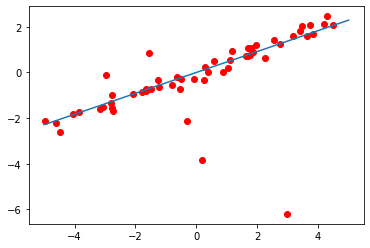

In [106]:
p = 0.99
threshold = 0.25
most_inliers, line = RANSAC(pts,threshold,p)
pts_inliers = remove_outliers(pts,line,threshold)
line = pca_line(pts_inliers)
line = line_normalizer(line[0],line[1],line[2])
print("Number of inliers:", most_inliers)

# PLOT IT !
plt = plot_graph(pts,line)
plt.show()